In [1]:
import wraplorenzmie.utilities.utilities as utilities
import wraplorenzmie.fits.fit as fit
import imageio
# For Plotting.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='white', font_scale=2)
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)


No module named 'pylorenzmie.fitting.cython.cminimizers'
Populating the interactive namespace from numpy and matplotlib


In [2]:
vid = utilities.video_reader("~/Documents/film0910/Basler_acA1920-155um__22392621__20191009_143652597.mp4")

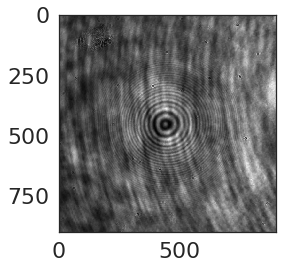

In [3]:
image = vid.get_image(1)
plt.imshow(image,cmap="gray")

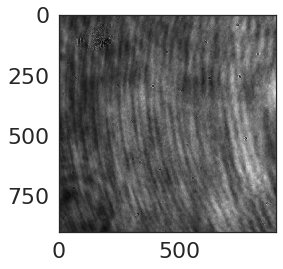

In [4]:
vid.number = 100000
vid.background = np.array(imageio.imread("~/Documents/film0910/MED_to_median.tif"))
plt.imshow(vid.background,cmap="gray")

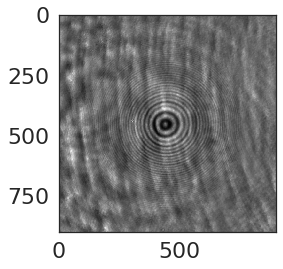

In [5]:
normed_image = utilities.normalize(image,vid.background)
plt.imshow(normed_image,cmap="gray")
normed_image = normed_image

In [6]:
feature, circ = utilities.center_find(normed_image)
feature

array([[439.29852519, 456.71324004, 272.        , 272.        ]])

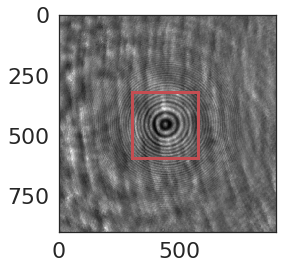

In [7]:
utilities.plot_bounding(normed_image,feature)

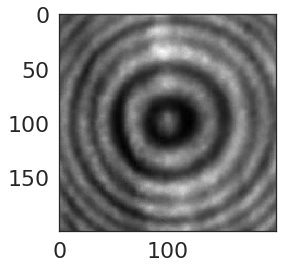

In [8]:
x, y, w, h = feature[0]
h=200
cropped = fit.crop(normed_image, int(x), int(y), int(h))
plt.imshow(cropped,cmap = "gray")

In [9]:
fitter = fit.fitting(cropped,0.633,0.08)

In [10]:
fitter.make_guess(2.5,1.58,25,fit_r=False,fit_n=False, fit_alpha =False)

In [11]:
result = fitter.fit_single(cropped, method = "lm")

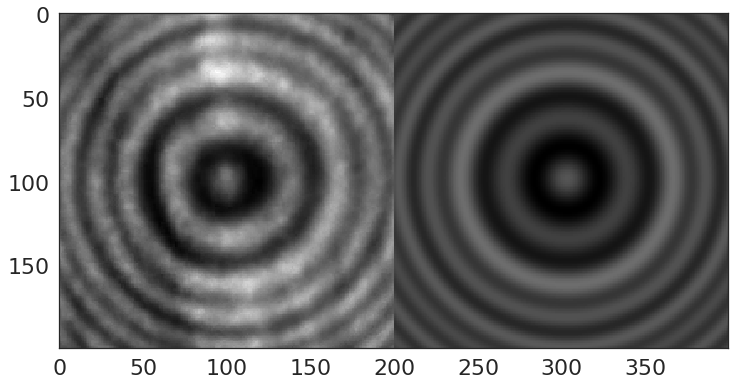

In [12]:
fitter.show_results()

In [13]:
result.final

{'x_p': 102.83648690550872,
 'y_p': 98.33994056208374,
 'z_p': 306.78837285316683,
 'a_p': 2.5,
 'n_p': 1.578072966031233,
 'k_p': 0.0,
 'n_m': 1.33,
 'wavelength': 0.633,
 'magnification': 0.08,
 'alpha': 0.8}

In [14]:
fit.globalize_result(result,x,y,h)
result.final

{'x_p': 442.1350120998394,
 'y_p': 455.05318059964054,
 'z_p': 306.78837285316683,
 'a_p': 2.5,
 'n_p': 1.578072966031233,
 'k_p': 0.0,
 'n_m': 1.33,
 'wavelength': 0.633,
 'magnification': 0.08,
 'alpha': 0.8}

In [38]:
fitter.fit_video(vid = vid,savefile="test_1.dat",xc = x ,yc= y, h = 200, n_end=1000,method = "amoeba-lm")

 20%|██        | 202/999 [00:47<03:12,  4.15it/s]WARNING:pylorenzmie.theory.Feature:Mean of data (0.94) is not near 1. Fit may not converge.


 62%|██████▏   | 617/999 [02:24<01:35,  3.98it/s]WARNING:pylorenzmie.theory.Feature:Mean of data (0.94) is not near 1. Fit may not converge.


 68%|██████▊   | 676/999 [02:38<01:14,  4.33it/s]WARNING:pylorenzmie.theory.Feature:Mean of data (0.94) is not near 1. Fit may not converge.


100%|██████████| 999/999 [03:54<00:00,  4.26it/s]


In [43]:
result.final

{'x_p': 442.1350120998394,
 'y_p': 455.05318059964054,
 'z_p': 306.78837285316683,
 'a_p': 2.5,
 'n_p': 1.578072966031233,
 'k_p': 0.0,
 'n_m': 1.33,
 'wavelength': 0.633,
 'magnification': 0.08,
 'alpha': 0.8}

In [44]:
1/17

0.058823529411764705

In [45]:
results = np.fromfile('test_1.dat', dtype=float32)
results = results.reshape(len(results) // 10,10)

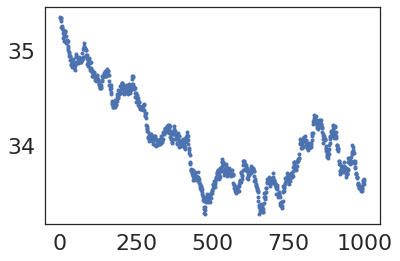

In [46]:
plt.plot(results[:,0]*0.08,'.')

In [47]:
fp = np.memmap("test_2", dtype="float32", mode="w+", shape=(int(1000-1), 10))

In [48]:
len(fp)

999

In [49]:
results

array([[4.4189066e+02, 4.5450735e+02, 3.0789346e+02, ..., 6.3300002e-01,
        7.9999998e-02, 8.0000001e-01],
       [4.4171820e+02, 4.5420523e+02, 3.0501767e+02, ..., 6.3300002e-01,
        7.9999998e-02, 8.0000001e-01],
       [4.4168445e+02, 4.5446240e+02, 3.0737323e+02, ..., 6.3300002e-01,
        7.9999998e-02, 8.0000001e-01],
       ...,
       [4.1996896e+02, 4.5918573e+02, 3.0877249e+02, ..., 6.3300002e-01,
        7.9999998e-02, 8.0000001e-01],
       [4.2026703e+02, 4.5906744e+02, 3.0915216e+02, ..., 6.3300002e-01,
        7.9999998e-02, 8.0000001e-01],
       [4.2061246e+02, 4.5825345e+02, 3.0837381e+02, ..., 6.3300002e-01,
        7.9999998e-02, 8.0000001e-01]], dtype=float32)